# Analysis of Ionizing Radiation Detection Data Using Linear Regression

## Introduction

This notebook guides you through the process of analyzing data from an Ionizing Radiation experiment, focusing on verifying the inverse square law. The analysis includes correcting for background radiation, fitting a linear model to the inverse square of distances versus count rates, visualizing this relationship, and interpreting the statistical significance.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Data
distances_m = np.array([0.153, 0.135, 0.115, 0.095, 0.075, 0.055, 0.035])
counts_in_60s = np.array([3078, 4211, 4996, 6799, 10218, 15924, 32831])

# Assuming background counts obtained from a separate part of the experiment
background_counts = 60  # Total background counts in 60 seconds

# Calculating count rates (counts per second) and correcting for background radiation
background_rate = background_counts / 60  # Background count rate (counts/s)
count_rates = (counts_in_60s / 60) - background_rate

# Calculating inverse square of distances
inverse_square_distance = 1 / distances_m**2


## Background Radiation Correction

Correction for background radiation is crucial for accurate measurements. It ensures that counts attributed solely to the experiment's radiation source are analyzed, excluding ambient radiation that could skew results.


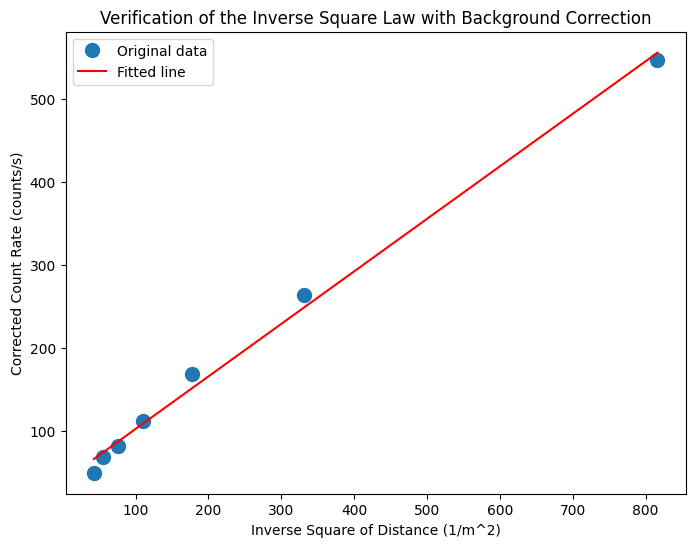

Slope (proportional to intensity): 0.6312
Intercept: 39.7920
R-squared value: 0.9948
p-value of the regression: 0.0000
Standard error of the estimate: 0.0205


In [2]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(inverse_square_distance, count_rates)

# Visualization
plt.figure(figsize=(8, 6))
plt.plot(inverse_square_distance, count_rates, 'o', label='Original data', markersize=10)
plt.plot(inverse_square_distance, intercept + slope * inverse_square_distance, 'r', label='Fitted line')
plt.xlabel('Inverse Square of Distance (1/m^2)')
plt.ylabel('Corrected Count Rate (counts/s)')
plt.title('Verification of the Inverse Square Law with Background Correction')
plt.legend()
plt.show()

# Display regression results
print(f"Slope (proportional to intensity): {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared value: {r_value**2:.4f}")
print(f"p-value of the regression: {p_value:.4f}")
print(f"Standard error of the estimate: {std_err:.4f}")


## Conclusion

The regression analysis, incorporating background radiation correction, provides a quantitative basis for assessing the experiment's adherence to the inverse square law. An `R-squared` value close to 1 suggests strong alignment with theoretical expectations, highlighting the experiment's success.


In [3]:
if r_value**2 > 0.9:
    print("The data strongly supports the inverse square law.")
else:
    print("The data does not strongly support the inverse square law.")


The data strongly supports the inverse square law.
